In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from collections import Counter

In [2]:
gp_table = pd.read_table('./crab_gp_kaz_10_2010-2019_calib_dina_2019-11-14.csv')

fl = np.genfromtxt('total_profile.txt')

In [3]:
gp_table['zeros_ends'] = None
gp_table['pears'] = None

In [5]:
for idx, value in enumerate(gp_table['fName']):
    
    profile = np.genfromtxt(value, skip_header=6)

    try:
        p0 = pearsonr(profile, fl)[0]
    except ValueError:
        gp_table['pears'][idx] = 0.1
    gp_table['pears'][idx] = p0
    
    start = profile[:10]
    end = profile[-10:]
    if  min(start) == max(start) == 0. or min(end) == max(end) == 0.:
        gp_table['zeros_ends'][idx] = 1
    else:
        gp_table['zeros_ends'][idx] = 0

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

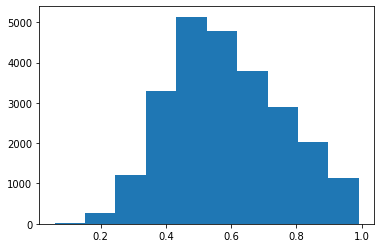

In [6]:
plt.close()
plt.hist(gp_table['pears'])
plt.show()

In [7]:
plt.close()
plt.hist(pear)
plt.show()

NameError: name 'pear' is not defined

In [8]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.863215,37.642590,./final_dataset/\obs_data_real_calib\13.02.201...,1,51612,240.462995,8.41105,63.16855,./final_dataset/gp_plot_real_calib/13.02.2010_...,./final_dataset/gp_plot_txt_real_calib/13.02.2...,0,0.572546
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,11420,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.738857
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,54882,163.337400,1.40060,4.54450,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.364402
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,18010,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.671781
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,36044,122.328620,3.72500,16.03985,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.382555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24559,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,32643,236.608495,2.65965,11.05580,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0,0.339548
24560,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,76505,234.382965,8.32910,11.41340,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,1,0.605988
24561,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,60631,228.207135,2.93530,9.84890,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0,0.478708
24562,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,16497,209.881705,3.63560,16.48685,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,1,0.586849


In [9]:
gp_table.to_csv('./crab_gp_kaz_10_2010-2019_calib_dina_2019-11-14.csv', sep='\t', header=True, index=False)